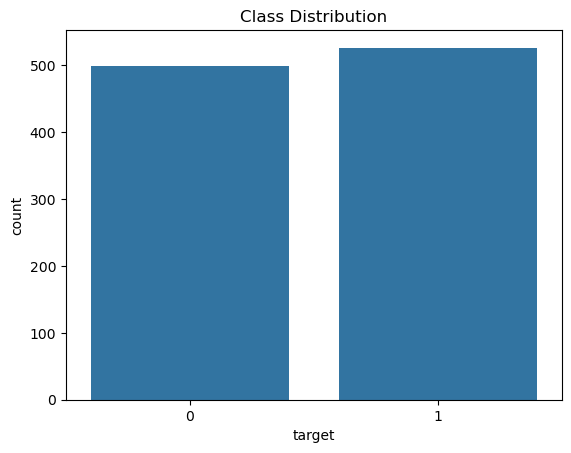

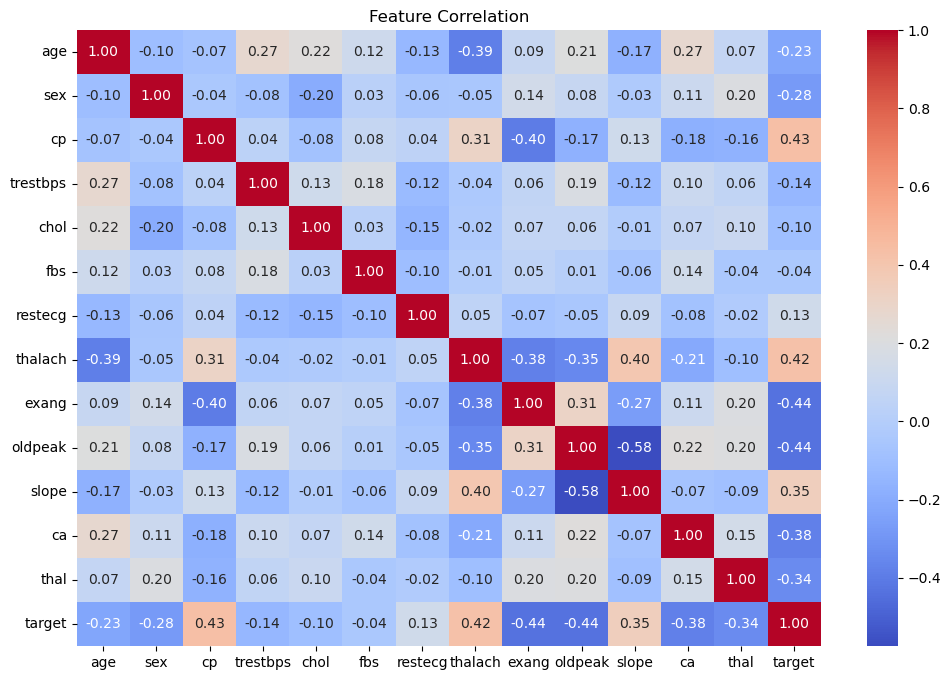

Base Model Evaluation:
Accuracy: 0.99
Recall: 0.97
Precision: 1.00
F1 Score: 0.99
ROC AUC: 1.00


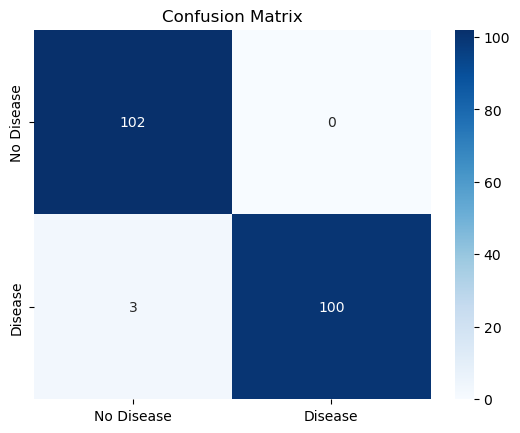

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Optimized Model Evaluation:
Accuracy: 0.99
Recall: 0.97
Precision: 1.00
F1 Score: 0.99
ROC AUC: 1.00


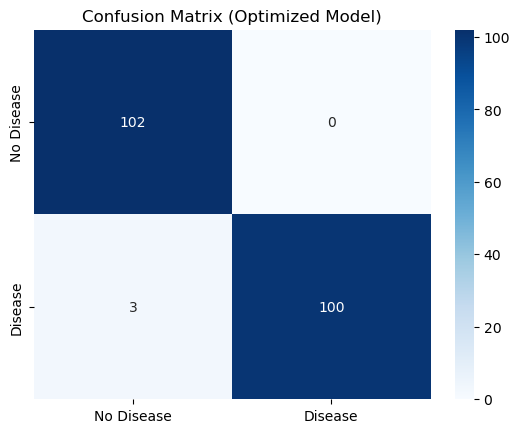

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load Dataset
data = pd.read_csv('Heart Disease.csv')

# Exploratory Data Analysis
sns.countplot(data=data, x="target")
plt.title("Class Distribution")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Data Splitting
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)

# Model Evaluation
y_pred = base_model.predict(X_test)
print("Base Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, base_model.predict_proba(X_test)[:, 1]):.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.show()

# Hyperparameter Tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "class_weight": [None, "balanced"]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Model Evaluation
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X_test)

print("Optimized Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_optimized):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_optimized):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_optimized):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, optimized_model.predict_proba(X_test)[:, 1]):.2f}")

conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(conf_matrix_optimized, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix (Optimized Model)")
plt.show()
